In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### load file

In [4]:
data_df = pd.read_csv("./height_weight.csv")
data_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [6]:
data_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [7]:
data_df["Height"] = round(data_df["Height"], 1)
data_df["Weight"] = round(data_df["Weight"], 1)
data_df.head()

,Gender,Height,Weight
0,Male,73.8,241.9
1,Male,68.8,162.3
2,Male,74.1,212.7
3,Male,71.7,220.0
4,Male,69.9,206.3


In [8]:
data_df = data_df.drop_duplicates(["Height", "Weight"])
data_df = data_df.reset_index(drop=True)
data_df

,Gender,Height,Weight
0,Male,73.8,241.9
1,Male,68.8,162.3
2,Male,74.1,212.7
3,Male,71.7,220.0
4,Male,69.9,206.3
...,...,...,...
9209,Female,59.1,110.5
9210,Female,66.2,136.8
9211,Female,67.1,170.9
9212,Female,63.9,128.5


In [9]:
data_df = data_df.sort_values(by="Height", axis=0)
data_df.head()

,Gender,Height,Weight
8596,Female,54.3,64.7
6217,Female,54.6,71.4
6829,Female,54.9,78.6
7120,Female,55.1,88.8
5004,Female,55.3,88.4


In [10]:
data_df.drop("Gender", axis=1, inplace=True)
data_df.head()

,Height,Weight
8596,54.3,64.7
6217,54.6,71.4
6829,54.9,78.6
7120,55.1,88.8
5004,55.3,88.4


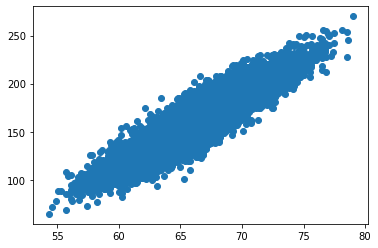

In [11]:
plt.scatter(data_df["Height"], data_df["Weight"])

In [12]:
x_average = sum(data_df["Height"]) / data_df.shape[0]
y_average = sum(data_df["Weight"]) / data_df.shape[0]
print(x_average, y_average)

66.374560451487 161.50762969394316


#### 표준편차 구하기

In [13]:
height_dispersion = 0
for i in data_df["Height"]:
    height_dispersion += (i - x_average)** 2
height_dispersion = np.sqrt(height_dispersion / data_df.shape[0])
print(height_dispersion)

3.903534224398419


In [14]:
weight_dispersion = 0
for i in data_df["Weight"]:
    weight_dispersion += (i - y_average) ** 2
weight_dispersion = np.sqrt(weight_dispersion / data_df.shape[0])
print(weight_dispersion)

32.53522065705104


#### 상관계수 구하기

In [15]:
r = 0
heights = np.array(data_df["Height"].tolist())
weights = np.array(data_df["Weight"].tolist())
for height, weight in zip(heights, weights):
    r += ((height - x_average) / height_dispersion) * ((weight - y_average) / weight_dispersion)
r /= data_df.shape[0] - 1
print(r)

0.9241491462927629


#### 기울기 구하기

In [16]:
b1 = r * weight_dispersion / height_dispersion
print(b1)

7.702608627517318


#### 절편 구하기

In [17]:
b0 = abs(b1 * x_average - y_average)
print(b0)

349.7496322873504


#### 예측

In [18]:
### y = b1x + b0
y_pred = np.array([])
for i in weights:
    y_pred = np.append(y_pred, [b1 * i + b0])
y_pred *= 0.1
print(y_pred)

[ 84.81084105  89.97158883  95.51746704 ... 230.54419628 224.22805721
 242.94539617]


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


class PimLinearRegression():
    def __init__(self, up_rate=10):
        self.a = 0  # 기울기
        self.b = 0  # y 절편
        self.data = None  # X, y 데이터프레임
        self.uprate = up_rate  # 증가량 

    def fit(self, X=None, y=None):
        if X is None or y is None:
            raise Exception("x and y cannot be None.")
        if not isinstance(X, np.ndarray) or not isinstance(y, np.ndarray):
            raise Exception("X and y should be ndarray")
        if len(X) != len(y):
            raise Exception("X length and y length cannot be different")
        self.fit_logic(X, y)

    # 학습
    def fit_logic(self, X, y):
        up = []  # 데이터마다 증가량에 따른 기울기를 담는 리스트.

        self.data = list(zip(X, y))
        self.data = np.sort(self.data)
        self.data = pd.DataFrame(self.data, columns=["X", "y"])

        def duplicate(x):
            duplicate_data = self.data[(self.data["X"] > (x - 0.1)) & (self.data["X"] < (x + 0.1))]["y"]
            return sum(duplicate_data) / len(duplicate_data)

        self.data["y"] = self.data["X"].apply(lambda x: duplicate(x))
        self.data = self.data.drop_duplicates(["y"], keep="first")
        self.data = self.data.reset_index(drop=True)

        for i in range(self.data.shape[0]):
            try:
                up.append((self.data.iloc[i, 1] - self.data.iloc[i + self.uprate, 1]) / (
                        self.data.iloc[i, 0] - self.data.iloc[i + self.uprate, 0]))
            except:
                pass

        for i in reversed(range(self.data.shape[0])):
            try:
                up.append((self.data.iloc[i, 1] - self.data.iloc[i - self.uprate, 1]) / (
                        self.data.iloc[i, 0] - self.data.iloc[i - self.uprate, 0]))
            except:
                pass

        # 기울기 구하기
        self.a = sum(up) / len(up)

        # 절편 구하기
        self.b = self.data.iloc[0, 1] - (self.a * self.data.iloc[0, 0])

    # 예측
    def predict(self, X):
        y_pred = []
        for i in X:
            y_pred.append(self.a * i + self.b)
        return y_pred

    # 정보
    def info(self, ifpr=True):
        if ifpr:
            print(f"y = {self.a}x + ({self.b})")
        return self.a, self.b

    def evaluation_graph(self, X, y):
        plt.scatter(X, y, label="original")
        plt.scatter(self.data.iloc[:, 0], self.data.iloc[:, 1], color="red", label="preprocessing")

        pred = self.predict(self.data.iloc[:, 0])
        plt.plot(self.data.iloc[:, 0], pred, color="yellow", label="predict")

        plt.legend()

        plt.show()

In [24]:
linearRegression = PimLinearRegression()
linearRegression.fit(heights, weights)

In [25]:
linearRegression.info()

y = 7.211179458903431x + (-326.8670446184563)


(7.211179458903431, -326.8670446184563)

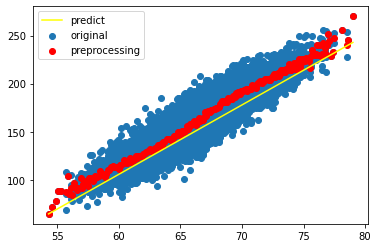

In [26]:
linearRegression.evaluation_graph(heights, weights)